<a href="https://colab.research.google.com/github/jabir-al-nahian/Heart_disease-prediction/blob/main/Heart_disease_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
import pandas as pd
#Standard Libs
%matplotlib inline
#<to show the plot in this learning notebook file as well (inline)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Modeling Libs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from scipy import stats

from sklearn import tree
from scipy.stats import randint

#Evaluation Libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

# 1. Upload Dataset from Local Drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets-5.csv to datasets-5.csv


In [ ]:
import io
datasets = pd.read_csv(io.BytesIO(uploaded['datasets-5.csv']))

In [ ]:
data = datasets

In [ ]:
datasets.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


# 2. Data Pre-processing

In [ ]:
datasets.shape

(1190, 12)

## 2.1 Check Missing Value

In [ ]:
# check missing value
datasets.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

## 2.2 Check Duplicate Value

In [ ]:
datasets.duplicated().sum()

272

In [ ]:
datasets.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [ ]:
datasets[datasets.duplicated() == True]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [ ]:
datasets = datasets.drop_duplicates(keep='first').reset_index(drop=True)

In [ ]:
datasets.shape

(918, 12)

In [ ]:
datasets.duplicated().sum()

0

#### datasets assign to new variable for safety

In [ ]:
data.shape

(1190, 12)

In [ ]:
data = datasets

In [ ]:
data.shape

(918, 12)

In [ ]:
data.target.value_counts()

1    508
0    410
Name: target, dtype: int64

<Axes: >

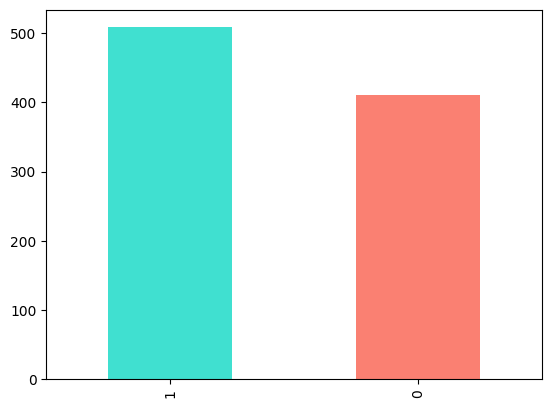

In [ ]:
data.target.value_counts().plot(kind = 'bar', color=['turquoise', 'salmon'])

In [ ]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
data_corr = data.corr()

In [ ]:
data_corr

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.261760,0.282039
sex,0.055750,1.000000,0.168254,0.005133,-0.200092,0.120076,-0.018343,-0.189186,0.190664,0.105734,0.148282,0.305445
chest pain type,0.165896,0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317256,0.471354
resting bp s,0.254399,0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.071477,0.107589
cholesterol,-0.095282,-0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.110928,-0.232741
fasting blood sugar,0.198039,0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.168627,0.267291
resting ecg,0.213152,-0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.081191,0.061011
max heart rate,-0.382045,-0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.341455,-0.400421
exercise angina,0.215793,0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.430044,0.494282
oldpeak,0.258612,0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.503017,0.403951


<Axes: >

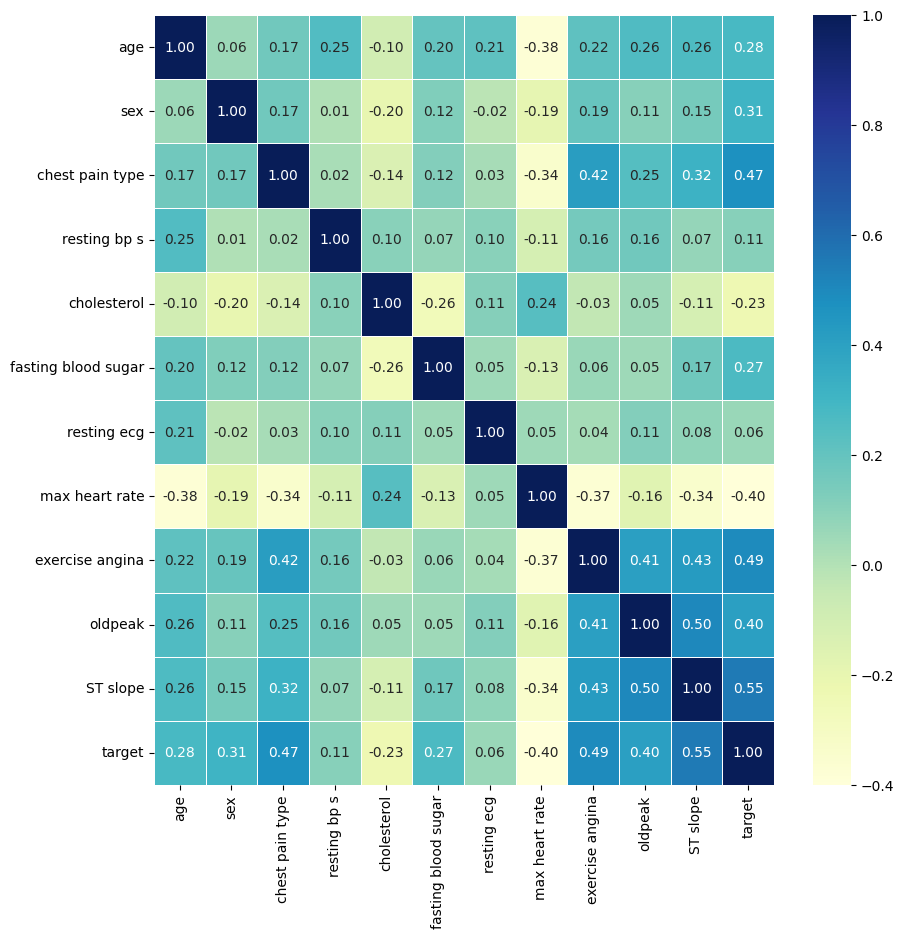

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot= True, linewidth = 0.5, fmt='0.2f', cmap='YlGnBu')

In [ ]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1
917,38,1,3,138,175,0,0,173,0,0.0,1,0


# 3. Partitioning of data

In [ ]:
X = data.drop('target', axis =1)
y= data.target

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=0)

# 4. Model Choosing and Training

### 4.1 Machine Learning Algorithms

In [ ]:
models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(random_state=0),
          'LR' : LogisticRegression(random_state=0),
          'DT' : tree.DecisionTreeClassifier(),
          'SVM' : svm.SVC(kernel='linear')
}

In [ ]:
def fit_and_score(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [ ]:
model_score = fit_and_score(models, X_train, X_test, y_train , y_test)
model_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6722689075630253,
 'RFC': 0.9747899159663865,
 'LR': 0.7983193277310925,
 'DT': 0.9243697478991597,
 'SVM': 0.7647058823529411}

### 4.2 Artificial Neural Network

In [ ]:
# ANN architecture
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 0.7636 - accuracy: 0.5686 - val_loss: 0.8019 - val_accuracy: 0.5126
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.5733 - val_loss: 0.7124 - val_accuracy: 0.5630
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7457 - accuracy: 0.5724 - val_loss: 0.6813 - val_accuracy: 0.5714
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.5574 - val_loss: 0.6696 - val_accuracy: 0.5546
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.5640 - val_loss: 0.6634 - val_accuracy: 0.5546
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.5864 - val_loss: 0.6612 - val_accuracy: 0.5714
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.5742 - val_loss: 0.6639 - val_accuracy: 0.5882
Epoch 8/100
3

In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy : {accuracy*100:.2f}%")

In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Evaluation for Dnn

In [ ]:
print(confusion_matrix(y_test, Y_pred_labels))
print('Precision Score :',precision_score(Y_pred_labels, y_test, average='weighted'))
print('recall score :',recall_score(Y_pred_labels,y_test, average='weighted'))
print('f1_score :',f1_score(Y_pred_labels, y_test, average='weighted'))

[[55  0]
 [64  0]]
Precision Score : 1.0
recall score : 0.46218487394957986
f1_score : 0.632183908045977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5. Performance Analysis

### Confusion Matrix for Precision, Recall, F1-Score Value

In [ ]:
# for CM
def fit_and_score_rfc(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='RFC'): rfc_predict = model.predict(X_test)

    return rfc_predict

In [ ]:
def fit_and_score_knn(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='KNN') : knn_predict = model.predict(X_test)
    return knn_predict

In [ ]:
def fit_and_score_dt(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='DT') : dt_predict = model.predict(X_test)
    return dt_predict

In [ ]:
def fit_and_score_lr(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='LR') : lr_predict = model.predict(X_test)
    return lr_predict

In [ ]:
def fit_and_score_svm(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='SVM') : svm_predict = model.predict(X_test)
    return svm_predict

In [ ]:
rfc_predict = fit_and_score_rfc(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, rfc_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[53  2]
 [ 1 63]]


In [ ]:
# Classifican report
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.97      0.98      0.98        64

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



In [ ]:
knn_predict = fit_and_score_knn(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, knn_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[35 20]
 [19 45]]


In [ ]:
# Classifican report
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64        55
           1       0.69      0.70      0.70        64

    accuracy                           0.67       119
   macro avg       0.67      0.67      0.67       119
weighted avg       0.67      0.67      0.67       119



In [ ]:
dt_predict = fit_and_score_dt(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, dt_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[51  4]
 [ 6 58]]


In [ ]:
# Classifican report
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.94      0.91      0.92        64

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



In [ ]:
lr_predict = fit_and_score_lr(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, lr_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[44 11]
 [13 51]]


In [ ]:
# Classifican report
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        55
           1       0.82      0.80      0.81        64

    accuracy                           0.80       119
   macro avg       0.80      0.80      0.80       119
weighted avg       0.80      0.80      0.80       119



In [ ]:
svm_predict = fit_and_score_svm(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, svm_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[41 14]
 [14 50]]


In [ ]:
# Classifican report
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        55
           1       0.78      0.78      0.78        64

    accuracy                           0.76       119
   macro avg       0.76      0.76      0.76       119
weighted avg       0.76      0.76      0.76       119



# 6. Feature Analysis

## 6.1 Cross-Validation

In [ ]:
data_Corr = datasets

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1
917,38,1,3,138,175,0,0,173,0,0.0,1,0


In [ ]:
correlation = data_corr.corr()

In [ ]:
correlation

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.095848,0.330785,0.322374,-0.415715,0.306338,0.149280,-0.718470,0.392898,0.381234,0.456262,0.477116
sex,0.095848,1.000000,0.348404,-0.154980,-0.568487,0.222099,-0.272679,-0.462998,0.331856,0.124103,0.290206,0.489037
chest pain type,0.330785,0.348404,1.000000,-0.094221,-0.525453,0.207373,-0.205361,-0.739420,0.709627,0.439338,0.613272,0.761702
resting bp s,0.322374,-0.154980,-0.094221,1.000000,0.038815,-0.032302,0.001546,-0.228191,0.083997,0.081415,-0.022931,-0.006193
cholesterol,-0.415715,-0.568487,-0.525453,0.038815,1.000000,-0.650177,0.124846,0.540268,-0.407241,-0.250157,-0.508503,-0.682764
fasting blood sugar,0.306338,0.222099,0.207373,-0.032302,-0.650177,1.000000,-0.116139,-0.377388,0.090537,-0.008230,0.248156,0.386523
resting ecg,0.149280,-0.272679,-0.205361,0.001546,0.124846,-0.116139,1.000000,0.090982,-0.217095,-0.104101,-0.145354,-0.203946
max heart rate,-0.718470,-0.462998,-0.739420,-0.228191,0.540268,-0.377388,0.090982,1.000000,-0.784088,-0.555738,-0.758808,-0.840892
exercise angina,0.392898,0.331856,0.709627,0.083997,-0.407241,0.090537,-0.217095,-0.784088,1.000000,0.645095,0.727822,0.776375
oldpeak,0.381234,0.124103,0.439338,0.081415,-0.250157,-0.008230,-0.104101,-0.555738,0.645095,1.000000,0.743064,0.608341


<Axes: >

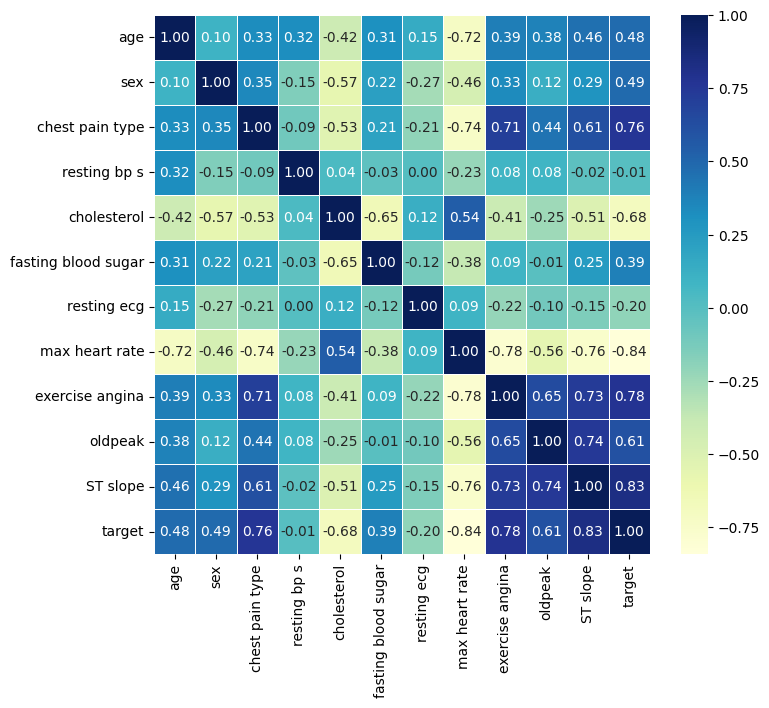

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(correlation, annot= True, linewidth = 0.5, fmt='0.2f', cmap='YlGnBu')

**We see that resting bp s, cholesterol, resting ecg, max heart rate , value is less than 0. That's means this 4 features are not importance for heart disease and we dicided this from data correlation matrix**

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
dataset = pd.read_csv(io.BytesIO(uploaded['datasets-5-corr (1).csv']))

data = dataset

dataset.head()

dataset.shape

# check missing value
dataset.isna().sum()

dataset.duplicated().sum()

dataset.duplicated()

dataset[dataset.duplicated() == True]

dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)

dataset.shape

data = dataset

data.target.value_counts()

X = data.drop('target', axis =1)
y= data.target

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=0)

models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(random_state=0),
          'LR' : LogisticRegression(random_state=0),
          'DT' : tree.DecisionTreeClassifier(),
          'SVM' : svm.SVC(kernel='linear')
}

def fit_and_score(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

model_score = fit_and_score(models, X_train, X_test, y_train , y_test)
model_score


Saving datasets-5-corr.csv to datasets-5-corr (1).csv


{'KNN': 0.7625, 'RFC': 0.825, 'LR': 0.8625, 'DT': 0.75, 'SVM': 0.8625}

### ANN

In [ ]:
# ANN architecture
model = Sequential()
model.add(Dense(11, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stop])



# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy : {accuracy*100:.2f}%")



Y_pred = model.predict(X_test)


# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

print(confusion_matrix(y_test, Y_pred_labels))
print('Precision Score :',precision_score(Y_pred_labels, y_test, average='weighted'))
print('recall score :',recall_score(Y_pred_labels,y_test, average='weighted'))
print('f1_score :',f1_score(Y_pred_labels, y_test, average='weighted'))



Epoch 1/100
23/23 [==============================] - 2s 18ms/step - loss: 0.8854 - accuracy: 0.5217 - val_loss: 0.6482 - val_accuracy: 0.6625
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.8109 - accuracy: 0.5484 - val_loss: 0.6730 - val_accuracy: 0.6625
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.8372 - accuracy: 0.5400 - val_loss: 0.6675 - val_accuracy: 0.6625
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7415 - accuracy: 0.5680 - val_loss: 0.6627 - val_accuracy: 0.6625
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7537 - accuracy: 0.5652 - val_loss: 0.6595 - val_accuracy: 0.6625
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.8036 - accuracy: 0.5316 - val_loss: 0.6518 - val_accuracy: 0.6750
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7267 - accuracy: 0.5596 - val_loss: 0.6432 - val_accuracy: 0.6750
Epoch 8/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performance for ML algo

### Confusion Matrix for Precision, recall, f1-score

In [ ]:
# for CM
def fit_and_score_rfc(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='RFC'): rfc_predict = model.predict(X_test)

    return rfc_predict


def fit_and_score_knn(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='KNN') : knn_predict = model.predict(X_test)
    return knn_predict

def fit_and_score_dt(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='DT') : dt_predict = model.predict(X_test)
    return dt_predict

def fit_and_score_lr(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='LR') : lr_predict = model.predict(X_test)
    return lr_predict

def fit_and_score_svm(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='SVM') : svm_predict = model.predict(X_test)
    return svm_predict


rfc_predict = fit_and_score_rfc(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, rfc_predict))
# Classifican report
print(classification_report(y_test,rfc_predict))




knn_predict = fit_and_score_knn(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, knn_predict))
# Classifican report
print(classification_report(y_test,knn_predict))




dt_predict = fit_and_score_dt(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, dt_predict))
# Classifican report
print(classification_report(y_test,dt_predict))


lr_predict = fit_and_score_lr(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, lr_predict))
# Classifican report
print(classification_report(y_test,lr_predict))




svm_predict = fit_and_score_svm(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, svm_predict))
# Classifican report
print(classification_report(y_test,svm_predict))



[[21  6]
 [ 8 45]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.88      0.85      0.87        53

    accuracy                           0.82        80
   macro avg       0.80      0.81      0.81        80
weighted avg       0.83      0.82      0.83        80

[[17 10]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        27
           1       0.81      0.83      0.82        53

    accuracy                           0.76        80
   macro avg       0.73      0.73      0.73        80
weighted avg       0.76      0.76      0.76        80

[[17 10]
 [11 42]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        27
           1       0.81      0.79      0.80        53

    accuracy                           0.74        80
   macro avg       0.71      0.71      0.71        80
weighted avg     

## 6.2 Lasso Algorithm for feature selection

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
dataset = pd.read_csv(io.BytesIO(uploaded['datasets-5 (1).csv']))

data = dataset

dataset.head()

dataset.shape

# check missing value
dataset.isna().sum()

dataset.duplicated().sum()

dataset.duplicated()

dataset[dataset.duplicated() == True]

dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)

dataset.shape

data = dataset

data.target.value_counts()

X = data.drop('target', axis =1)
y= data.target

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Saving datasets-5.csv to datasets-5 (1).csv


In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [ ]:
names= X.columns
print("Column Names: {}".format(names.values))

Column Names: ['age' 'sex' 'chest pain type' 'resting bp s' 'cholesterol'
 'fasting blood sugar' 'resting ecg' 'max heart rate' 'exercise angina'
 'oldpeak' 'ST slope']


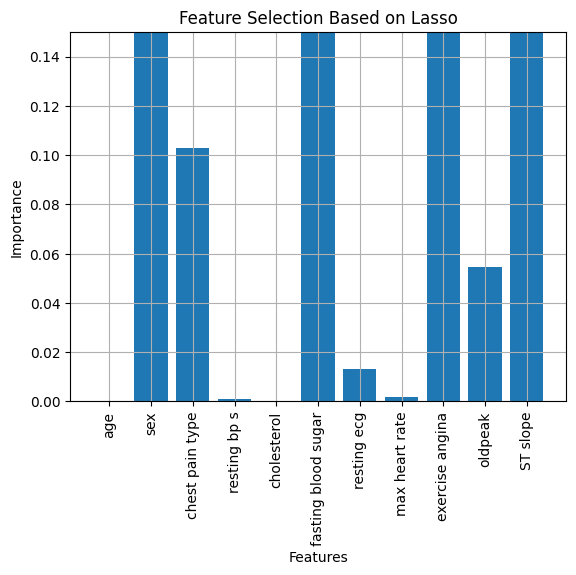

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

**We see that resting bp s, cholesterol, max heart rate , value is less than 0. That's means this 4 features are not importance for heart disease and we dicided this from LASSO Algorithm **

## Start Code for Lasso feature selection

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
dataset = pd.read_csv(io.BytesIO(uploaded['datasets-5-Lasso (1).csv']))

data = dataset

dataset.head()

dataset.shape

# check missing value
dataset.isna().sum()

dataset.duplicated().sum()

dataset.duplicated()

dataset[dataset.duplicated() == True]

dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)

dataset.shape

data = dataset

data.target.value_counts()

X = data.drop('target', axis =1)
y= data.target

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=0)

models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(random_state=0),
          'LR' : LogisticRegression(random_state=0),
          'DT' : tree.DecisionTreeClassifier(),
          'SVM' : svm.SVC(kernel='linear')
}

def fit_and_score(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

model_score = fit_and_score(models, X_train, X_test, y_train , y_test)
model_score

Saving datasets-5-Lasso.csv to datasets-5-Lasso (1).csv


{'KNN': 0.8048780487804879,
 'RFC': 0.7317073170731707,
 'LR': 0.8780487804878049,
 'DT': 0.6341463414634146,
 'SVM': 0.8780487804878049}

## ANN

In [ ]:
# ANN architecture
model = Sequential()
model.add(Dense(11, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stop])



# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy : {accuracy*100:.2f}%")



Y_pred = model.predict(X_test)


# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

print(confusion_matrix(y_test, Y_pred_labels))
print('Precision Score :',precision_score(Y_pred_labels, y_test, average='weighted'))
print('recall score :',recall_score(Y_pred_labels,y_test, average='weighted'))
print('f1_score :',f1_score(Y_pred_labels, y_test, average='weighted'))




Epoch 1/100
12/12 [==============================] - 2s 21ms/step - loss: 1.1997 - accuracy: 0.4632 - val_loss: 0.8181 - val_accuracy: 0.3902
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1826 - accuracy: 0.4659 - val_loss: 0.7973 - val_accuracy: 0.3902
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1652 - accuracy: 0.4278 - val_loss: 0.7799 - val_accuracy: 0.2927
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0377 - accuracy: 0.4796 - val_loss: 0.7656 - val_accuracy: 0.2927
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0340 - accuracy: 0.4768 - val_loss: 0.7538 - val_accuracy: 0.2927
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0128 - accuracy: 0.4796 - val_loss: 0.7403 - val_accuracy: 0.3659
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9588 - accuracy: 0.4632 - val_loss: 0.7309 - val_accuracy: 0.4390
Epoch 8/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion martrix for P, R, F1

In [ ]:
# for CM
def fit_and_score_rfc(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='RFC'): rfc_predict = model.predict(X_test)

    return rfc_predict


def fit_and_score_knn(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='KNN') : knn_predict = model.predict(X_test)
    return knn_predict

def fit_and_score_dt(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='DT') : dt_predict = model.predict(X_test)
    return dt_predict

def fit_and_score_lr(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='LR') : lr_predict = model.predict(X_test)
    return lr_predict

def fit_and_score_svm(models, X_train, X_test, y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
        if(name=='SVM') : svm_predict = model.predict(X_test)
    return svm_predict


rfc_predict = fit_and_score_rfc(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, rfc_predict))
# Classifican report
print(classification_report(y_test,rfc_predict))




knn_predict = fit_and_score_knn(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, knn_predict))
# Classifican report
print(classification_report(y_test,knn_predict))




dt_predict = fit_and_score_dt(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, dt_predict))
# Classifican report
print(classification_report(y_test,dt_predict))


lr_predict = fit_and_score_lr(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, lr_predict))
# Classifican report
print(classification_report(y_test,lr_predict))




svm_predict = fit_and_score_svm(models, X_train, X_test, y_train , y_test)

# confusion matrix
print(confusion_matrix(y_test, svm_predict))
# Classifican report
print(classification_report(y_test,svm_predict))


[[12  4]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.82      0.72      0.77        25

    accuracy                           0.73        41
   macro avg       0.72      0.73      0.73        41
weighted avg       0.75      0.73      0.73        41

[[14  2]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.90      0.76      0.83        25

    accuracy                           0.80        41
   macro avg       0.80      0.82      0.80        41
weighted avg       0.82      0.80      0.81        41

[[13  3]
 [12 13]]
              precision    recall  f1-score   support

           0       0.52      0.81      0.63        16
           1       0.81      0.52      0.63        25

    accuracy                           0.63        41
   macro avg       0.67      0.67      0.63        41
weighted avg     

# 7. Hyperparameter Tunning using RSCV

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
dataset = pd.read_csv(io.BytesIO(uploaded['datasets-5-corr (3).csv']))

data = dataset

dataset.head()

dataset.shape

# check missing value
dataset.isna().sum()

dataset.duplicated().sum()

dataset.duplicated()

dataset[dataset.duplicated() == True]

dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)

dataset.shape

data = dataset

data.target.value_counts()

X = data.drop('target', axis =1)
y= data.target

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=0)

Saving datasets-5-corr.csv to datasets-5-corr (3).csv


## KNN

In [ ]:
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# tuning n_neighbors
train_score = []
test_score = []
# create range for n_neighbors
kn = range(5,30)
#KNN instance through range
for i in kn:
    KNN.set_params(n_neighbors = i)
    # Fit
    KNN.fit(X_train,y_train)
    # update scores lists
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))

Max KNN accuracy 81.250000%


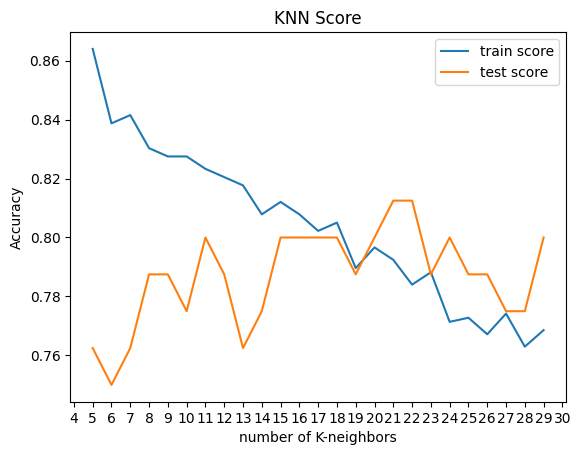

In [ ]:
plt.plot(kn, train_score, label='train score')
plt.plot(kn, test_score, label='test score')
plt.xticks(np.arange(4,31,1))
plt.xlabel('number of K-neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Score')
plt.legend();
print(f'Max KNN accuracy {max(test_score)*100:2f}%')

In [ ]:
LR_hp = {'C': np.logspace(-4,4,20),
         'solver': ['liblinear', 'lbfgs']}

RFC_hp = {'n_estimators': np.arange(1,1600,10),
          'max_depth': [None, 3,5,6,10,50,100,200,300 , 400,500, 700,800,900,1000, 1200,1300,1500],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

SVM_hp = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf','linear','sigmoid'] }
DT_hp = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

## RFC

In [ ]:
# Tuning RFC
rfc = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                        param_distributions = RFC_hp,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)
# Fit
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10, 50,
                                                      100, 200, 300, 400, 500,
                                                      700, 800, 900, 1000, 1200,
                                                      1300, 1500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([   1,   11,   21,   31,   41,   51,   61,   71,   81,   91,  101,
        111...
        881,  891,  901,  911,  921,  931,  941,  951,  961,  971,  981,
        991, 1001, 1011, 1021, 1031, 1041, 1051, 1061, 1071, 1081, 1091,
       1101, 1111, 1121, 1131, 1141, 1151, 1161, 1171, 1181, 1191, 1201,
       1211, 1221, 1231, 1241, 1251, 1261, 1271, 1281, 1291, 1301, 1311,
       1321, 1331, 1341, 1351, 1361, 1371, 1381, 1391, 1401, 1411, 1421,
       1431, 1441, 1451, 1461, 1471, 1481, 1491, 1501, 1511, 1521, 1531,
       1541, 1551, 1561, 1571, 1581, 1591])},
                   verbose=True)

In [ ]:
rfc.score(X_test,y_test)

0.85

In [ ]:
rfc.best_params_

{'n_estimators': 631,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_depth': None}

In [ ]:
# Tuning RFC
RFC_hp2 = { 'n_estimators': [510,610],
            'max_depth': [None,10],
            'min_samples_split': [10,12],
            'min_samples_leaf': [1,2]}

rfc_gs = GridSearchCV(RandomForestClassifier(random_state=0),
                        param_grid = RFC_hp2,
                        cv = 5,
                        verbose = True)
# Fit
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12],
                         'n_estimators': [510, 610]},
             verbose=True)

In [ ]:
rfc_gs.score(X_test,y_test)

0.85

In [ ]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 610}

## DT

In [ ]:
tree = tree.DecisionTreeClassifier()

In [ ]:
dt = RandomizedSearchCV(tree, DT_hp, cv=5)

In [ ]:
dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf68b8757e0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf681ac2bc0>})

In [ ]:
dt.score(X_test,y_test)

0.8125

In [ ]:
dt.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 1}

## LR

In [ ]:
# Tuning LR
lr_gs = GridSearchCV(LogisticRegression(random_state=0),
                        param_grid = LR_hp,
                        cv = 5,
                        verbose = True)

In [ ]:
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [ ]:
lr_gs.score(X_test,y_test)

0.8315217391304348

In [ ]:
lr_gs.best_params_

{'C': 29.763514416313132, 'solver': 'liblinear'}

In [ ]:
# Tuning LR
lr = RandomizedSearchCV(LogisticRegression(random_state=0),
                        param_distributions = LR_hp,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)
# Fit
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [ ]:
lr.score(X_test,y_test)

0.8625

In [ ]:
# best parameters
lr.best_params_

{'solver': 'lbfgs', 'C': 78.47599703514607}

## SVM

In [ ]:
svm_gs = GridSearchCV(svm.SVC(),
                      param_grid = SVM_hp,
                      cv=5,
                      verbose = 3)

In [ ]:
svm_gs.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.857 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.816 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.822 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.551 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=3)

In [ ]:
svm_gs.score(X_test,y_test)

0.8369565217391305

In [ ]:
# best parameters
svm_gs.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

## RSCV for SVM

In [ ]:
model= svm.SVC(probability = True, random_state = 1)

In [ ]:
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}

In [ ]:
svm_rs = RandomizedSearchCV(model, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017)

In [ ]:
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=1),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cf68b0f50f0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cf68b0f4970>},
                   random_state=2017)

In [ ]:
svm_rs.cv_results_

{'mean_fit_time': array([0.22480607, 0.17204992, 0.21305609, 0.20030904, 0.19284654,
        0.21358069, 0.2126716 , 0.20309329, 0.1906689 , 0.23513977,
        0.19877982, 0.18880439, 0.23649653, 0.13201904, 0.23465347,
        0.12736241, 0.20929941, 0.22161976, 0.15101703, 0.15558489]),
 'std_fit_time': array([0.00913428, 0.00651923, 0.03251   , 0.00742679, 0.00210243,
        0.00345095, 0.01150334, 0.0236546 , 0.01573964, 0.03200503,
        0.03137274, 0.0007697 , 0.00370401, 0.00209587, 0.01055859,
        0.043638  , 0.00234714, 0.00297541, 0.00558196, 0.02088487]),
 'mean_score_time': array([0.03247666, 0.02497745, 0.031195  , 0.01994991, 0.02204927,
        0.03088665, 0.02723344, 0.02208757, 0.02343861, 0.02831753,
        0.02017204, 0.0249509 , 0.02878165, 0.01791159, 0.04115121,
        0.01979264, 0.02350561, 0.03315473, 0.02148   , 0.01031884]),
 'std_score_time': array([0.00179782, 0.00111376, 0.00191535, 0.00248793, 0.00304985,
        0.00583098, 0.00364354, 0.007394

In [ ]:
svm_rs.score(X_test,y_test)

0.8

In [ ]:
# best parameters
svm_rs.best_params_

{'C': 6.733970816481659, 'gamma': 0.10614926514043757}

## Performance analysis

## LR

In [ ]:
# Plot Area under the curve for Logistic Modek
lrgs_predict = lr.predict(X_test)

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,lrgs_predict))

[[23  4]
 [ 7 46]]


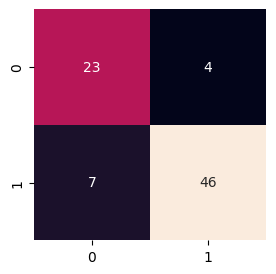

In [ ]:
def plot_confusion(y_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,lrgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,lrgs_predict)

In [ ]:
# Classifican report
print(classification_report(y_test,lrgs_predict))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.92      0.87      0.89        53

    accuracy                           0.86        80
   macro avg       0.84      0.86      0.85        80
weighted avg       0.87      0.86      0.86        80



In [ ]:
lr.best_params_

{'solver': 'lbfgs', 'C': 78.47599703514607}

#### 20-fold CV

In [ ]:
# cross validation accuracy
lr_new = LogisticRegression(solver= 'lbfgs', C= 78.47599703514607, random_state=0)

cv_accuracy = cross_val_score(lr_new, X, y, cv=20, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8230448717948718

In [ ]:
# cross validation precision
cv_precision = cross_val_score(lr_new, X, y, cv=20, scoring = 'precision')
cv_precision = cv_precision.mean()
cv_precision

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8449087931406147

In [ ]:
# cross validation recall

cv_recall = cross_val_score(lr_new, X, y, cv=20, scoring = 'recall')
cv_recall = cv_recall.mean()
cv_recall

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.863858695652174

In [ ]:
# cross validation f1

cv_f1 = cross_val_score(lr_new, X, y, cv=20, scoring = 'f1')
cv_f1 = cv_f1.mean()
cv_f1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8498922928208709

## RF

[[23  4]
 [ 8 45]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.92      0.85      0.88        53

    accuracy                           0.85        80
   macro avg       0.83      0.85      0.84        80
weighted avg       0.86      0.85      0.85        80



{'n_estimators': 631,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_depth': None}

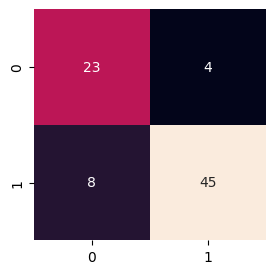

In [ ]:


# Plot Area under the curve for Logistic Modek
rfcgs_predict = rfc.predict(X_test)

# confusion matrix
print(confusion_matrix(y_test,rfcgs_predict))


def plot_confusion(y_test,rfcgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,rfcgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,rfcgs_predict)


# Classifican report
print(classification_report(y_test,rfcgs_predict))

rfc.best_params_



In [ ]:
# 20-fold CV

# cross validation accuracy
lr_new = RandomForestClassifier(min_samples_leaf=3, n_estimators= 631, min_samples_split=14,random_state=0)

cv_accuracy = cross_val_score(lr_new, X, y, cv=20, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy




0.8253205128205128

In [ ]:
# cross validation precision
cv_precision = cross_val_score(lr_new, X, y, cv=20, scoring = 'precision')
cv_precision = cv_precision.mean()
cv_precision

0.8342677716853769

In [ ]:
# cross validation recall

cv_recall = cross_val_score(lr_new, X, y, cv=20, scoring = 'recall')
cv_recall = cv_recall.mean()
cv_recall

0.8853260869565217

In [ ]:

# cross validation f1

cv_f1 = cross_val_score(lr_new, X, y, cv=20, scoring = 'f1')
cv_f1 = cv_f1.mean()
cv_f1

0.8548272342959777

## KNN

[[18  9]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        27
           1       0.84      0.87      0.85        53

    accuracy                           0.80        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.80      0.80      0.80        80



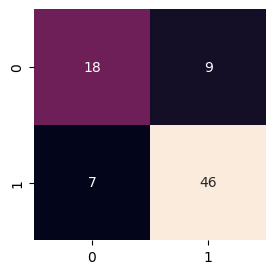

In [ ]:
# Plot Area under the curve for Logistic Modek
knngs_predict = KNN.predict(X_test)

# confusion matrix
print(confusion_matrix(y_test,knngs_predict))


def plot_confusion(y_test,knngs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,knngs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,knngs_predict)


# Classifican report
print(classification_report(y_test,knngs_predict))


In [ ]:
# 20-fold CV

# cross validation accuracy
lr_new = KNeighborsClassifier(weights= 'distance', n_neighbors= 22, metric = 'manhattan')

cv_accuracy = cross_val_score(lr_new, X, y, cv=20, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

0.8029807692307692

In [ ]:
# cross validation precision
cv_precision = cross_val_score(lr_new, X, y, cv=20, scoring = 'precision')
cv_precision = cv_precision.mean()
cv_precision


0.8181118489884428

In [ ]:
# cross validation recall

cv_recall = cross_val_score(lr_new, X, y, cv=20, scoring = 'recall')
cv_recall = cv_recall.mean()
cv_recall

0.8680253623188406

In [ ]:
# cross validation f1

cv_f1 = cross_val_score(lr_new, X, y, cv=20, scoring = 'f1')
cv_f1 = cv_f1.mean()
cv_f1


0.8373375652721331

## DT

[[21  6]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.88      0.83      0.85        53

    accuracy                           0.81        80
   macro avg       0.79      0.80      0.80        80
weighted avg       0.82      0.81      0.81        80



{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 1}

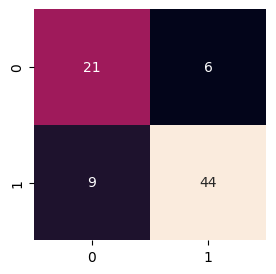

In [ ]:
# Plot Area under the curve for Logistic Modek
lrgs_predict = dt.predict(X_test)

# confusion matrix
print(confusion_matrix(y_test,lrgs_predict))


def plot_confusion(y_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,lrgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,lrgs_predict)


# Classifican report
print(classification_report(y_test,lrgs_predict))

dt.best_params_


In [ ]:
# 20-fold CV

# cross validation accuracy
lr_new = tree.DecisionTreeClassifier()

cv_accuracy = cross_val_score(lr_new, X, y, cv=20,scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy


0.755

In [ ]:
# cross validation precision
cv_precision = cross_val_score(lr_new, X, y, cv=20, scoring = 'precision')
cv_precision = cv_precision.mean()
cv_precision

0.7966907311624658

In [ ]:
# cross validation recall

cv_recall = cross_val_score(lr_new, X, y, cv=20, scoring = 'recall')
cv_recall = cv_recall.mean()
cv_recall

0.7935688405797101

In [ ]:
# cross validation f1

cv_f1 = cross_val_score(lr_new, X, y, cv=20, scoring = 'f1')
cv_f1 = cv_f1.mean()
cv_f1


0.7962979705950879

## SVM

[[19  8]
 [ 8 45]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        27
           1       0.85      0.85      0.85        53

    accuracy                           0.80        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.80      0.80      0.80        80



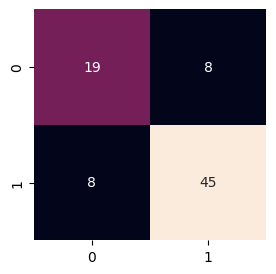

In [ ]:
# Plot Area under the curve for Logistic Modek
lrgs_predict = svm_rs.predict(X_test)

# confusion matrix
print(confusion_matrix(y_test,lrgs_predict))


def plot_confusion(y_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,lrgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,lrgs_predict)


# Classifican report
print(classification_report(y_test,lrgs_predict))

In [ ]:
svm_rs.best_params_

{'C': 6.733970816481659, 'gamma': 0.10614926514043757}

In [ ]:
# 20-fold CV

# cross validation accuracy
lr_new = svm.SVC(C = 6.733970816481659 , gamma = 0.10614926514043757,  probability = True, random_state = 1)

cv_accuracy = cross_val_score(lr_new, X, y, cv=20, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

0.8094230769230769

In [ ]:
# cross validation precision
cv_precision = cross_val_score(lr_new, X, y, cv=20, scoring = 'precision')
cv_precision = cv_precision.mean()
cv_precision


0.8320205587032113

In [ ]:
# cross validation recall

cv_recall = cross_val_score(lr_new, X, y, cv=20, scoring = 'recall')
cv_recall = cv_recall.mean()
cv_recall


0.8573369565217389

In [ ]:
# cross validation f1

cv_f1 = cross_val_score(lr_new, X, y, cv=20, scoring = 'f1')
cv_f1 = cv_f1.mean()
cv_f1

0.8397272616494572